In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/spam_ham_dataset.csv')

In [3]:
df

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [4]:
df.shape

(5171, 2)

In [5]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5171 non-null   object
 1   text    5171 non-null   object
dtypes: object(2)
memory usage: 80.9+ KB


In [7]:
df

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [8]:
df.sample(5)

,label,text
4070,ham,Subject: industrial accounts\r\ni will leave r...
616,ham,"Subject: hpl nom for april 4 , 2001\r\n( see a..."
3699,ham,Subject: fun pics . htm\r\n-\r\n- fun pics . htm
1573,spam,"Subject: proccess credit cards online , hispan..."
1816,ham,"Subject: re : october wellhead\r\njulie ,\r\nt..."


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['label'] = encoder.fit_transform(df['label'])

In [11]:
df.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


In [12]:
# missing values
df.isnull().sum()

label    0
text     0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

178

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(4993, 2)

## 2.EDA

In [17]:
df['label'].value_counts()

0    3531
1    1462
Name: label, dtype: int64

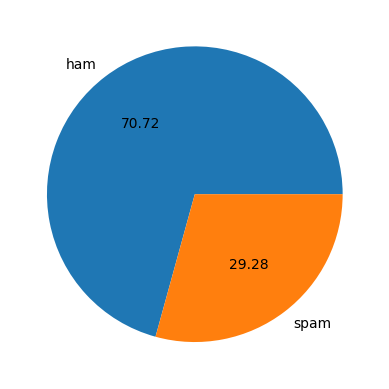

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
# Data is imbalanced

In [20]:
import nltk

In [21]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
df['num_characters'] = df['text'].apply(len)

<ipython-input-23-f0cf0a313c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [24]:
df.head()

,label,text,num_characters
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,1,"Subject: photoshop , windows , office . cheap ...",414
4,0,Subject: re : indian springs\r\nthis deal is t...,336


In [25]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-25-7b1825ae98a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [26]:
df.head()

,label,text,num_characters,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71


In [27]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-27-17fdd65f9b92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [28]:
df.head()

,label,text,num_characters,num_words,num_sentences
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,13.386942
std,1547.863387,340.702932,27.959959
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,4.000000
50%,557.000000,125.000000,7.000000
75%,1262.000000,288.000000,15.000000
max,32258.000000,8863.000000,1204.000000


In [30]:
# ham
df[df['label'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,11.662419
std,1402.785831,337.018933,25.330035
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,4.000000
50%,538.000000,128.000000,7.000000
75%,1253.500000,298.500000,13.500000
max,32258.000000,8863.000000,1204.000000


In [31]:
#spam
df[df['label'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,17.551984
std,1840.112883,349.439381,33.111447
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,4.000000
50%,589.000000,119.500000,9.000000
75%,1305.000000,252.750000,19.000000
max,22073.000000,3963.000000,693.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

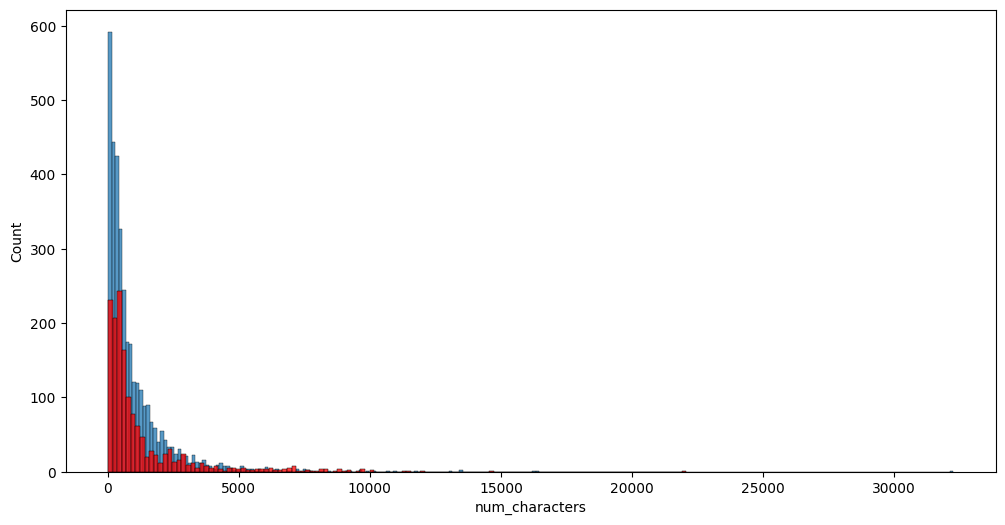

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_characters'])
sns.histplot(df[df['label'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

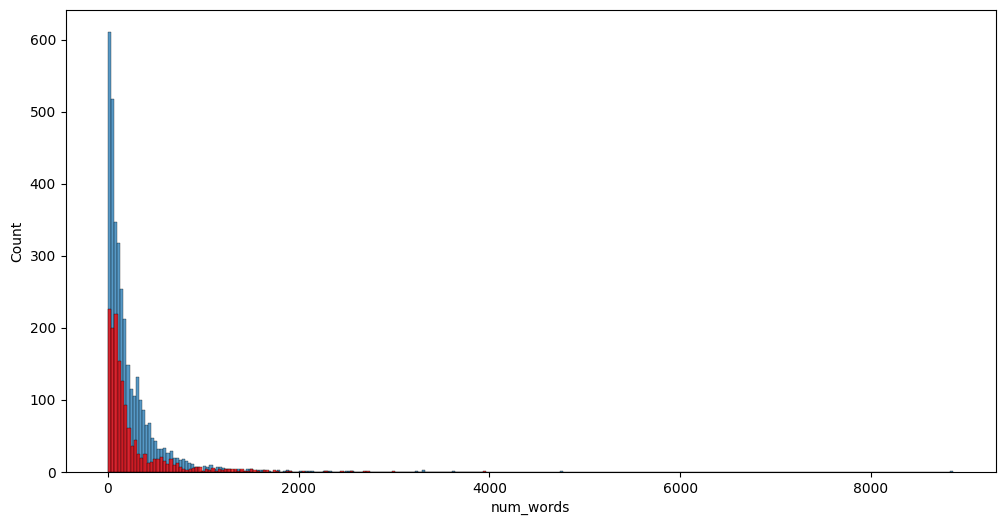

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['label'] == 0]['num_words'])
sns.histplot(df[df['label'] == 1]['num_words'],color='red')

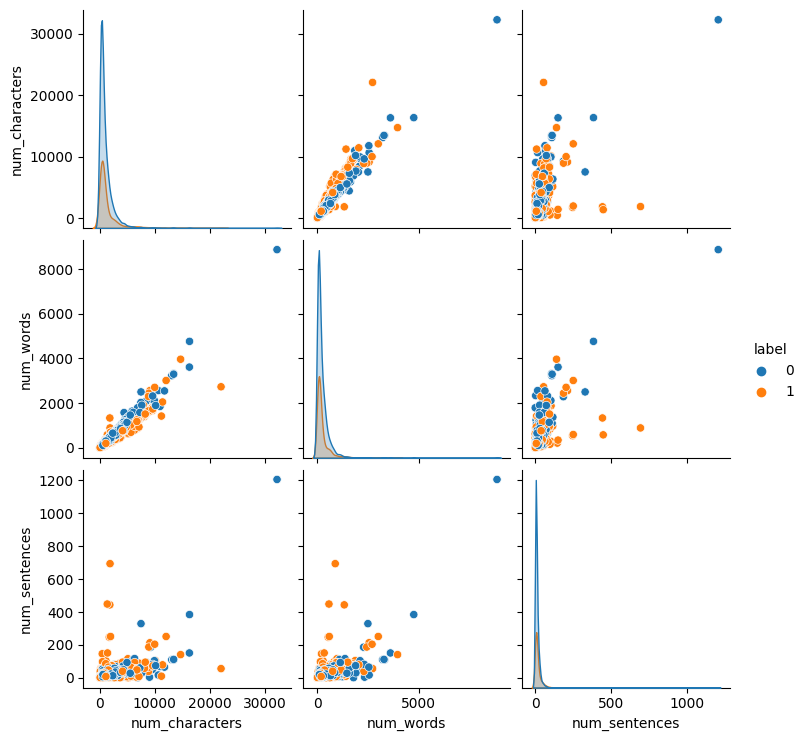

In [35]:
sns.pairplot(df,hue='label')

<Axes: >

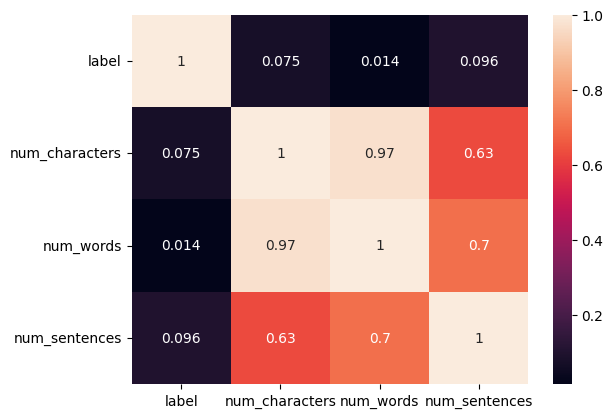

In [36]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus import stopwords
import string

In [39]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [42]:
df['text'][10]

"Subject: vocable % rnd - word asceticism\r\nvcsc - brand new stock for your attention\r\nvocalscape inc - the stock symbol is : vcsc\r\nvcsc will be our top stock pick for the month of april - stock expected to\r\nbounce to 12 cents level\r\nthe stock hit its all time low and will bounce back\r\nstock is going to explode in next 5 days - watch it soar\r\nwatch the stock go crazy this and next week .\r\nbreaking news - vocalscape inc . announces agreement to resell mix network\r\nservices\r\ncurrent price : $ 0 . 025\r\nwe expect projected speculative price in next 5 days : $ 0 . 12\r\nwe expect projected speculative price in next 15 days : $ 0 . 15\r\nvocalscape networks inc . is building a company that ' s revolutionizing the\r\ntelecommunications industry with the most affordable phone systems , hardware ,\r\nonline software , and rates in canada and the us . vocalscape , a company with\r\nglobal reach , is receiving international attention for the development of voice\r\nover ip ( 

In [43]:
df['transformed_text'] = df['text'].apply(transform_text)

<ipython-input-43-b507aa02865d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [44]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

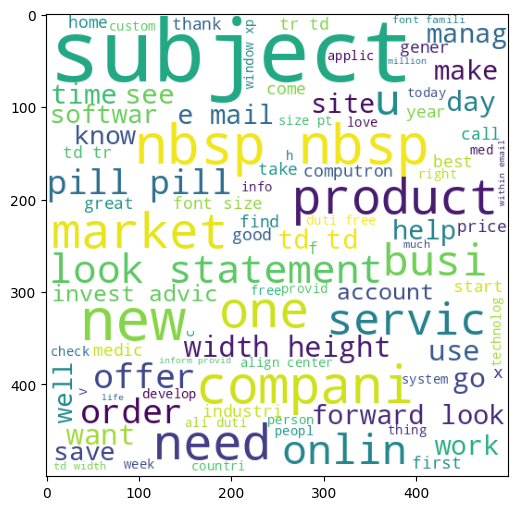

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

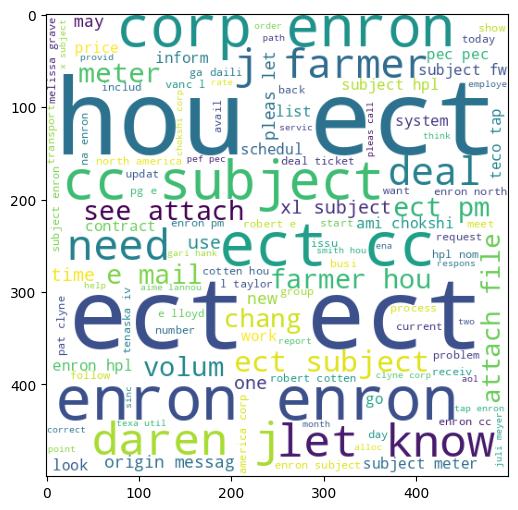

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


In [51]:
spam_corpus = []
for msg in df[df['label'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [52]:
len(spam_corpus)

196592

In [53]:
df.dtypes

label                int64
text                object
num_characters       int64
num_words            int64
num_sentences        int64
transformed_text    object
dtype: object

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: ignored

In [55]:
ham_corpus = []
for msg in df[df['label'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

380475

In [58]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

TypeError: ignored

In [59]:
# Text Vectorization
# using Bag of Words
df.head()

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3,subject enron methanol meter 988291 follow not...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,3,subject hpl nom januari 9 2001 see attach file...
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,24,subject neon retreat ho ho ho around wonder ti...
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3,subject photoshop window offic cheap main tren...
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3,subject indian spring deal book teco pvr reven...


## 4. Model Building

In [60]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [61]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [62]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [64]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [63]:
X.shape

(4993, 3000)

In [65]:
y = df['label'].values

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [68]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix

In [69]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [70]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.953953953953954
[[677  20]
 [ 26 276]]


In [71]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))


0.9229229229229229
[[637  60]
 [ 17 285]]


In [72]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9039039039039038
[[645  52]
 [ 44 258]]


In [73]:
# tfidf --> MNB

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [75]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

In [76]:
clfs = {
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
}

In [77]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    return accuracy

In [78]:
train_classifier(knc,X_train,y_train,X_test,y_test)

0.7347347347347347

In [79]:
accuracy_scores = []

for name,clf in clfs.items():
    
    current_accuracy= train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    
    accuracy_scores.append(current_accuracy)

For  KN
Accuracy -  0.7347347347347347
For  NB
Accuracy -  0.9229229229229229
For  DT
Accuracy -  0.8448448448448449
For  LR
Accuracy -  0.960960960960961
For  RF
Accuracy -  0.965965965965966


In [80]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores}).sort_values('Accuracy',ascending=False)

In [81]:
performance_df

,Algorithm,Accuracy
4,RF,0.965966
3,LR,0.960961
1,NB,0.922923
2,DT,0.844845
0,KN,0.734735


In [82]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [83]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.965966
1,LR,Accuracy,0.960961
2,NB,Accuracy,0.922923
3,DT,Accuracy,0.844845
4,KN,Accuracy,0.734735


In [84]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [85]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores}).sort_values('Accuracy_max_ft_3000',ascending=False)

In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores}).sort_values('Accuracy_scaling',ascending=False)

In [87]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [88]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores}).sort_values('Accuracy_num_chars',ascending=False)

In [90]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Accuracy_scaling_x,Accuracy_scaling_y,Accuracy_num_chars
0,RF,0.965966,0.965966,0.965966,0.965966
1,LR,0.960961,0.960961,0.960961,0.960961
2,NB,0.922923,0.922923,0.922923,0.922923
3,DT,0.844845,0.844845,0.844845,0.844845
4,KN,0.734735,0.734735,0.734735,0.734735


In [91]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))